In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Análise exploratória dos dados

#### Leitura e info

In [2]:
data = pd.read_csv('dados.csv')
data.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            707 non-null    object
 1   Competition       707 non-null    object
 2   Matchday          707 non-null    object
 3   Date              707 non-null    object
 4   Venue             707 non-null    object
 5   Club              707 non-null    object
 6   Opponent          697 non-null    object
 7   Result            707 non-null    object
 8   Playing_Position  707 non-null    object
 9   Minute            697 non-null    object
 10  At_score          707 non-null    object
 11  Type              706 non-null    object
 12  Goal_assist       492 non-null    object
dtypes: object(13)
memory usage: 71.9+ KB


#### Padronização e correção de typos

##### Season

In [4]:
data['Season'].unique()

array(['15/16', '18/19', '11-Dec', '08/09', '20/21', '13/14', '06/07',
       '22/23', '07/08', '09/10', '16/17', '10/11', '17/18', 'Dec-13',
       '14/15', '19/20', '21/22', '04/05', '05/06', '12/13'], dtype=object)

In [5]:
data['Season'] = data['Season'].replace(['11-Dec', 'Dec-13'], ['11/12', '12/13'])
data['Season'].unique()

array(['15/16', '18/19', '11/12', '08/09', '20/21', '13/14', '06/07',
       '22/23', '07/08', '09/10', '16/17', '10/11', '17/18', '12/13',
       '14/15', '19/20', '21/22', '04/05', '05/06'], dtype=object)

In [ ]:
# Função para converter a temporada em um valor numérico para ordenação
def season_to_numeric(season):
    start_year, end_year = map(int, season.split('/'))
    return start_year  # Ordena pelo ano inicial da temporada

# Ordena com base na season
data['season_numeric'] = data['Season'].apply(season_to_numeric)
data = data.sort_values(by='season_numeric').drop(columns=['season_numeric']) 
data = data.reset_index(drop=True)
data.head(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,NaN,02:00,CF,90+1,02:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,LaLiga,21,1/29/06,A,FC Barcelona,NaN,00:03,CF,83,00:03,Left-footed shot,Ronaldinho Gaacho
2,05/06,LaLiga,24,2/18/06,H,FC Barcelona,NaN,05:01,RW,84,05:01,Left-footed shot,NaN
3,05/06,LaLiga,21,1/29/06,A,FC Barcelona,NaN,00:03,CF,75,00:02,Right-footed shot,Sylvinho
4,05/06,Copa del Rey,Quarter-Finals,02-01/06,H,FC Barcelona,NaN,02:01,CF,42,01:00,Header,Ludovic Giuly


##### Competition

In [7]:
data['Competition'].unique()

array(['LaLiga', 'Copa del Rey', 'UEFA Champions League',
       'FIFA Club World Cup', 'Supercopa', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions', 'Champions League',
       'Troph�e des Champions'], dtype=object)

In [8]:
data['Competition']= data['Competition'].replace('Troph�e des Champions','Trophée des Champions')
data['Competition']= data['Competition'].replace('Champions League','UEFA Champions League')

data['Competition'].unique()

array(['LaLiga', 'Copa del Rey', 'UEFA Champions League',
       'FIFA Club World Cup', 'Supercopa', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions'], dtype=object)

##### Matchday

In [9]:
data['Matchday'].unique()

array(['34', '21', '24', 'Quarter-Finals', 'Group Stage', '20', '19',
       '13', '37', '26', 'Semi-Finals', '27', '38', '35', '2', '28', '6',
       '1', '4', '25', 'last 16', '7', '5', '9', 'Round of 16', 'Final',
       '3', '11', 'Fifth Round', '18', '15', '31', '33', '17', '8', '36',
       'final', '30', '10', '5th round', '14', '12', '22', '4th round',
       '32', '29', '16', '23'], dtype=object)

In [10]:
# Função para padronizar os valores de matchday
def standardize_matchday(value):
    value = value.lower()

    mapping = {
        'final': 'Final',
        'group stage': 'Group Stage',
        'last 16': 'Round of 16',
        'round of 16': 'Round of 16',
        'quarter-finals': 'Quarter-Finals',
        'semi-finals': 'Semi-Finals',
        '5th round': 'Fifth Round',
        '4th round': 'Fourth Round',
        'fifth round': 'Fifth Round'
    }
    
    # Verifica se o valor está no mapeamento
    if value in mapping:
        return mapping[value]
    
    # Caso não esteja, retorna o valor original (números já estão padronizados)
    return value.capitalize() if value.isalpha() else value

standardized_matchday = [standardize_matchday(value) for value in data['Matchday']]

data['Matchday'] = standardized_matchday
data['Matchday'].unique()

array(['34', '21', '24', 'Quarter-Finals', 'Group Stage', '20', '19',
       '13', '37', '26', 'Semi-Finals', '27', '38', '35', '2', '28', '6',
       '1', '4', '25', 'Round of 16', '7', '5', '9', 'Final', '3', '11',
       'Fifth Round', '18', '15', '31', '33', '17', '8', '36', '30', '10',
       '14', '12', '22', 'Fourth Round', '32', '29', '16', '23'],
      dtype=object)

##### Date

In [11]:
data['Date'].unique()

array(['05-01/05', '1/29/06', '2/18/06', '02-01/06', '11-02/05',
       '1/22/06', '1/15/06', '11/27/05', '06/09/07', '03/10/07',
       '4/18/07', '3/17/07', '6/17/07', '5/20/07', '09/09/06', '3/31/07',
       '10/15/06', '9/27/06', '8/28/06', '9/22/07', '10-02/07', '2/24/08',
       '05-04/08', '11/27/07', '9/19/07', '2/20/08', '11/24/07',
       '10/07/07', '11/07/07', '9/26/07', '9/29/07', '10/28/07',
       '1/24/09', '03/07/09', '01/06/09', '3/22/09', '02-01/09',
       '11-01/08', '11/29/08', '10-01/08', '5/13/09', '10/22/08',
       '9/27/08', '03/11/09', '04/08/09', '11-04/08', '9/21/08',
       '05-02/09', '11/16/08', '11/12/08', '01/11/09', '12/13/08',
       '1/17/09', '4/18/09', '10-04/08', '5/27/09', '03-04/09', '4/25/09',
       '03-01/09', '11/26/08', '9/13/08', '12/09/09', '05-01/10',
       '3/21/10', '01/10/10', '3/14/10', '04/06/10', '1/23/10', '9/19/09',
       '10/25/09', '12/16/09', '05-04/10', '5/16/10', '9/29/09',
       '12/19/09', '12/05/09', '3/17/10', '8/23

In [12]:
import re
# Função para pré-processar as datas (substitui hífens por barras)
def preprocess_date(date):
    if isinstance(date, str):
        date = re.sub(r'[-]', '/', date) 
        return date.strip()
    return date

# Função para padronizar as datas no formato dd/mm/yyyy
def standardize_date(date):
    formats = [
        '%m/%d/%y', 
        '%m/%d/%Y',  
        '%Y/%m/%d', 
    ]
    for fmt in formats:
        try:
            return pd.to_datetime(date, format=fmt).strftime('%d/%m/%Y')
        except ValueError:
            continue
    return None

data['Date'] = data['Date'].apply(preprocess_date).apply(standardize_date)
data['Date'].unique()

array(['01/05/2005', '29/01/2006', '18/02/2006', '01/02/2006',
       '02/11/2005', '22/01/2006', '15/01/2006', '27/11/2005',
       '09/06/2007', '10/03/2007', '18/04/2007', '17/03/2007',
       '17/06/2007', '20/05/2007', '09/09/2006', '31/03/2007',
       '15/10/2006', '27/09/2006', '28/08/2006', '22/09/2007',
       '02/10/2007', '24/02/2008', '04/05/2008', '27/11/2007',
       '19/09/2007', '20/02/2008', '24/11/2007', '07/10/2007',
       '07/11/2007', '26/09/2007', '29/09/2007', '28/10/2007',
       '24/01/2009', '07/03/2009', '06/01/2009', '22/03/2009',
       '01/02/2009', '01/11/2008', '29/11/2008', '01/10/2008',
       '13/05/2009', '22/10/2008', '27/09/2008', '11/03/2009',
       '08/04/2009', '04/11/2008', '21/09/2008', '02/05/2009',
       '16/11/2008', '12/11/2008', '11/01/2009', '13/12/2008',
       '17/01/2009', '18/04/2009', '04/10/2008', '27/05/2009',
       '04/03/2009', '25/04/2009', '01/03/2009', '26/11/2008',
       '13/09/2008', '09/12/2009', '01/05/2010', '21/03

##### Venue

In [13]:
data['Venue'].unique()

array(['H', 'A'], dtype=object)

##### Club

In [14]:
data['Club'].unique()

array(['FC Barcelona', 'Paris Saint-Germain'], dtype=object)

##### Opponent

In [15]:
data['Opponent'].unique()

array([nan, 'RCD Espanyol Barcelona', 'Real Madrid', 'Getafe CF',
       'Recreativo Huelva', 'Gimnastic de Tarragona',
       'Atletico de Madrid', 'CA Osasuna', 'Deportivo de La Coruaa',
       'Sevilla FC', 'SV Werder Bremen', 'VfB Stuttgart', 'Levante UD',
       'Valencia CF', 'Olympique Lyon', 'Celtic FC', 'Rangers FC',
       'Real Zaragoza', 'UD Almera', 'CD Numancia', 'Athletic Bilbao',
       'Malaga CF', 'Racing Santander', 'Shakhtar Donetsk',
       'FC Basel 1893', 'Bayern Munich', 'Sporting GijÃ³n', 'Benidorm CD',
       'Manchester United', 'RCD Mallorca', 'Sporting CP', 'Dynamo Kyiv',
       'Villarreal CF', 'CD Tenerife', 'Arsenal FC', 'Real Valladolid CF',
       'CF Atlante', 'Club Estudiantes de La Plata', 'Cultural Leonesa',
       'FC Copenhagen', 'Real Betis Balompie', 'Panathinaikos Athens',
       'Real Sociedad', 'Hercules CF', 'Club Atletico de Ceuta',
       'Bayer 04 Leverkusen', 'BATE Borisov', 'AC Milan',
       'FC Viktoria Plzen', 'Santos FC', 'Rayo Val

Valores faltosos marcados com nan

In [16]:
data['Opponent'] = data['Opponent'].replace({
    'Borussia MÃ¶nchengladbach': 'Borussia Mönchengladbach',
    'Sporting GijÃ³n': 'Sporting Gijón',
    'CÃ³rdoba CF': 'Córdoba CF',
    'Deportivo de La Coruaa': 'Deportivo de La Coruña',
    'UD Almera': 'UD Almería',
    'Montpellier': 'Montpellier HSC',
})

data['Opponent'].unique()

array([nan, 'RCD Espanyol Barcelona', 'Real Madrid', 'Getafe CF',
       'Recreativo Huelva', 'Gimnastic de Tarragona',
       'Atletico de Madrid', 'CA Osasuna', 'Deportivo de La Coruña',
       'Sevilla FC', 'SV Werder Bremen', 'VfB Stuttgart', 'Levante UD',
       'Valencia CF', 'Olympique Lyon', 'Celtic FC', 'Rangers FC',
       'Real Zaragoza', 'UD Almería', 'CD Numancia', 'Athletic Bilbao',
       'Malaga CF', 'Racing Santander', 'Shakhtar Donetsk',
       'FC Basel 1893', 'Bayern Munich', 'Sporting Gijón', 'Benidorm CD',
       'Manchester United', 'RCD Mallorca', 'Sporting CP', 'Dynamo Kyiv',
       'Villarreal CF', 'CD Tenerife', 'Arsenal FC', 'Real Valladolid CF',
       'CF Atlante', 'Club Estudiantes de La Plata', 'Cultural Leonesa',
       'FC Copenhagen', 'Real Betis Balompie', 'Panathinaikos Athens',
       'Real Sociedad', 'Hercules CF', 'Club Atletico de Ceuta',
       'Bayer 04 Leverkusen', 'BATE Borisov', 'AC Milan',
       'FC Viktoria Plzen', 'Santos FC', 'Rayo Val

##### Result

In [17]:
data['Result'].unique()

array(['02:00', '00:03', '05:01', '02:01', '05:00', '04:01', '02:02',
       '03:03', '05:02', '00:04', '01:05', '00:06', '03:00', '03:01',
       '01:01', '02:03', '00:02', '06:00', '01:04', '01:03', '01:02',
       '00:05', '04:00', '01:06', '02:06', '01:00', '00:01', '06:01',
       '04:03', '02:05', '02:04', '1:2 AET', '04:02', '00:08', '07:01',
       '08:00', '03:02', '00:07', '05:03', '04:05', '07:00', '03:04',
       '5:4 AET', '06:02', '08:02', '04:04', '01:07', '2:1', '0:3', '4:2',
       '4:3', '7:2', '1:1', '2:0', '1:3'], dtype=object)

In [18]:
# Trata o AET (At Extra Time)
data['result_cleaned'] = data['Result'].str.replace(' AET', '', regex=False)
data['extra_time_flag'] = data['Result'].str.contains('AET', regex=False)

data[['messi_team_result', 'opponent_result']] = data['result_cleaned'].str.split(':', expand=True)

# Converte as novas colunas para tipo numérico
data['messi_team_result'] = data['messi_team_result'].astype('Int64')
data['opponent_result'] = data['opponent_result'].astype('Int64')
data['total_goals'] = data['messi_team_result'] + data['opponent_result'].astype('Int64')

data[['messi_team_result', 'opponent_result', 'total_goals']]

,messi_team_result,opponent_result,total_goals
0,2,0,2
1,0,3,3
2,5,1,6
3,0,3,3
4,2,1,3
...,...,...,...
702,2,1,3
703,2,0,2
704,0,5,5
705,0,5,5


##### Playing Position

In [19]:
data['Playing_Position'].unique()

array(['CF', 'RW', 'LW', 'SS', 'AM'], dtype=object)

In [20]:
data['Playing_Position'] = data['Playing_Position'].replace({
    'RW ': 'RW',
    'CF ': 'CF',
    'AM ': 'AM',
    'SS ': 'SS',
})
data['Playing_Position'].unique()

array(['CF', 'RW', 'LW', 'SS', 'AM'], dtype=object)

##### Minute

In [21]:
data['Minute'].unique()

array(['90+1', '83', '84', '75', '42', '34', '82', '50', '51', '57', nan,
       '43', '80', '39', '59', '72', '66', '44', '5', '58', '79', '81',
       '19', '41', '18', '10', '49', '31', '11', '26', '78', '90+2', '55',
       '4', '90', '40', '38', '61', '85', '86', '9', '35', '76', '89',
       '21', '8', '70', '87', '23', '65', '30', '37', '54', '15', '56',
       '90+3', '16', '25', '110', '88', '13', '63', '74', '45', '7', '67',
       '68', '36', '32', '64', '3', '22', '12', '46', '77', '20', '52',
       '73', '53', '33', '28', '69', '27', '17', '45+2', '24', '60', '71',
       '48', '29', '-1', '6', '90+4', '47', '45+1', '62', '14', '45+4',
       '90+5'], dtype=object)

Possui valores faltosos marcados com nan

In [22]:
# Função para converter a coluna de minutos em númerica (devido ao formato string dos acréscrimos)
def convert_minute(minute):
    try:
        if pd.isna(minute) or str(minute).strip().lower() == 'nan':  # Trata valores ausentes
            return None
        minute = str(minute).strip()  # Garante que é string e remove espaços extras
        if '+' in minute:  # Trata formatos com "+"
            base, extra = minute.split('+')
            return int(base) + int(extra)
        minute = int(minute)  # Converte strings numéricas diretamente
        return minute if minute >= 0 else None
    except ValueError:
        print(f"Valor inválido encontrado: {minute}") 
        return None
        
# Converte as novas colunas para tipo numérico
data['Minute'] = data['Minute'].apply(convert_minute)
data['Minute'] = data['Minute'].astype('Int64') 

data['Minute'].unique()

<IntegerArray>
[  91,   83,   84,   75,   42,   34,   82,   50,   51,   57, <NA>,   43,   80,
   39,   59,   72,   66,   44,    5,   58,   79,   81,   19,   41,   18,   10,
   49,   31,   11,   26,   78,   92,   55,    4,   90,   40,   38,   61,   85,
   86,    9,   35,   76,   89,   21,    8,   70,   87,   23,   65,   30,   37,
   54,   15,   56,   93,   16,   25,  110,   88,   13,   63,   74,   45,    7,
   67,   68,   36,   32,   64,    3,   22,   12,   46,   77,   20,   52,   73,
   53,   33,   28,   69,   27,   17,   47,   24,   60,   71,   48,   29,    6,
   94,   62,   14,   95]
Length: 95, dtype: Int64

##### At_score

In [23]:
data['At_score'].unique()

array(['02:00', '00:03', '05:01', '00:02', '01:00', '03:00', '02:01',
       '03:03', '01:01', '00:04', '00:05', '02:02', '00:01', '03:01',
       '01:02', '02:03', '01:03', '01:05', '02:05', '04:01', '01:06',
       '01:04', '04:00', '05:02', '00:07', '04:02', '05:00', '03:02',
       '07:00', '08:00', '03:05', '02:04', '06:00', '03:04', '00:06',
       '06:01', '06:02', '04:03', '1:0', '0:2', '4:3', '4:1', '2:2',
       '0:1', '2:1', '2:0'], dtype=object)

Separando o score de cada time em novas colunas:

In [24]:
data[['messi_team_at_score', 'opponent_at_score']] = data['At_score'].str.split(':', expand=True)

data['messi_team_at_score'] = data['messi_team_at_score'].astype('Int64')
data['opponent_at_score'] = data['opponent_at_score'].astype('Int64')

data[['messi_team_at_score', 'opponent_at_score']]

,messi_team_at_score,opponent_at_score
0,2,0
1,0,3
2,5,1
3,0,2
4,1,0
...,...,...
702,2,1
703,2,0
704,0,5
705,0,4


##### Type

In [25]:
data['Type'].unique()

array(['Left-footed shot', 'Right-footed shot', 'Header', nan, 'Solo run',
       'Deflected shot on goal', 'Penalty', 'Penalty rebound',
       'Counter attack goal', 'Direct free kick', 'Chest', 'Tap-in',
       'Long distance kick'], dtype=object)

Valor faltoso marcados com nan

##### Goal_assist

In [26]:
data['Goal_assist'].unique()

array(['Ronaldinho Gaacho', nan, 'Sylvinho', 'Ludovic Giuly',
       'Mark van Bommel', 'Samuel Etoo', 'Deco', 'Gianluca Zambrotta',
       'Giovanni van Bronckhorst', 'Xavi', 'Andres Iniesta',
       'Thierry Henry', 'Dani Alves', 'Aleksandr Hleb', 'Gerard Pique',
       'Bojan Krkic', 'Pedro', 'Zlatan Ibrahimovic', 'Seydou Keita',
       'Yaya Toure', 'Ã‰ric Abidal', 'Maxwell', 'Adriano', 'David Villa',
       'Sergio Busquets', 'Ibrahim Afellay', 'Thiago', 'Cristian Tello',
       'Cesc Fabregas', 'Alexis Sanchez', 'Isaac Cuenca', 'Jordi Alba',
       'Marta Montoya', 'Alex Song', 'Neymar', 'Antonio A05a',
       'Ivan Rakitic', 'Luis Suarez', 'Marc Bartra', 'Rafinha',
       'Arda Turan', 'Munir El Haddadi', 'Javier Mascherano',
       'Sergi Roberto', 'Lucas Digne', 'Denis Suarez', 'Aleix Vidal',
       'Ousmane Dembele', 'Paco Alcacer', 'Paulinho', 'Philippe Coutinho',
       'Arturo Vidal', 'Nelson Semedo', 'Malcom', 'Clement Lenglet',
       'Antoine Griezmann', 'Arthur', 'Riqu

In [27]:
# Corrige os nomes e substitui valores nan por 'N/A' (marcados pelo próprio Messi)
data['Goal_assist'] = data['Goal_assist'].replace({
    'Ronaldinho Gaacho': 'Ronaldinho Gaucho',
    'Francisco TrincÃ£o': 'Francisco Trincao',
    'Ã‰ric Abidal': 'Eric Abidal',
    'Antonio A05a': 'Antonio Amaya',
    'Thiago': 'Thiago Alcantara',
    '\t': None
}).fillna('N/A')

data['Goal_assist'].unique()

array(['Ronaldinho Gaucho', 'N/A', 'Sylvinho', 'Ludovic Giuly',
       'Mark van Bommel', 'Samuel Etoo', 'Deco', 'Gianluca Zambrotta',
       'Giovanni van Bronckhorst', 'Xavi', 'Andres Iniesta',
       'Thierry Henry', 'Dani Alves', 'Aleksandr Hleb', 'Gerard Pique',
       'Bojan Krkic', 'Pedro', 'Zlatan Ibrahimovic', 'Seydou Keita',
       'Yaya Toure', 'Eric Abidal', 'Maxwell', 'Adriano', 'David Villa',
       'Sergio Busquets', 'Ibrahim Afellay', 'Thiago Alcantara',
       'Cristian Tello', 'Cesc Fabregas', 'Alexis Sanchez',
       'Isaac Cuenca', 'Jordi Alba', 'Marta Montoya', 'Alex Song',
       'Neymar', 'Antonio Amaya', 'Ivan Rakitic', 'Luis Suarez',
       'Marc Bartra', 'Rafinha', 'Arda Turan', 'Munir El Haddadi',
       'Javier Mascherano', 'Sergi Roberto', 'Lucas Digne',
       'Denis Suarez', 'Aleix Vidal', 'Ousmane Dembele', 'Paco Alcacer',
       'Paulinho', 'Philippe Coutinho', 'Arturo Vidal', 'Nelson Semedo',
       'Malcom', 'Clement Lenglet', 'Antoine Griezmann', 'Ar

#### a) Descrição do tipo das variáveis

**Variáveis qualitativas:**
- **Season**: Ano ou período da temporada (Ordinal)
- **Competition**: Nome da competição (Nominal)
- **Matchday**: Número da rodada na competição (Ordinal)
- **Date**: Data do jogo (Ordinal)
- **Venue**: Local do jogo, H para Home (em casa) e A para Away (fora) (Nominal)
- **Club**: Time do Messi (Nominal)
- **Opponent**: Time adversário (Nominal)
- **Playing_Position**: Posição do Messi em campo (Nominal)
- **Type**: Tipo do gol (Nominal)
- **Goal_assist**: Nome do jogador que deu assistência (Nominal)

**Variáveis quantitativas:**
- **Result**: Resultado da partida (Discreta)
  
    ##### Ao separar as partes do placar (gols do time do Messi à esquerda e gols do time B à direita), cada uma dessas partes pode ser tratada como uma variável quantitativa discreta, pois representam contagens de gols, que são números inteiros.
- **Minute**: Minuto da contribuição do Messi (Discreta)
- **At_score**: Placar no momento da contribuição (Discreta)
  ##### Segue a mesma lógica da variável Result.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Season               707 non-null    object
 1   Competition          707 non-null    object
 2   Matchday             707 non-null    object
 3   Date                 707 non-null    object
 4   Venue                707 non-null    object
 5   Club                 707 non-null    object
 6   Opponent             697 non-null    object
 7   Result               707 non-null    object
 8   Playing_Position     707 non-null    object
 9   Minute               694 non-null    Int64 
 10  At_score             707 non-null    object
 11  Type                 706 non-null    object
 12  Goal_assist          707 non-null    object
 13  result_cleaned       707 non-null    object
 14  extra_time_flag      707 non-null    bool  
 15  messi_team_result    707 non-null    Int64 
 16  opponent

#### b) Descrição das estatísticas básicas de cada variável

##### Estatísticas descritivas gerais

In [29]:
numeric_data = data.select_dtypes(include=['int64'])
stats = numeric_data.describe()

# Moda
mode = numeric_data.mode().iloc[0]  # Seleciona a primeira moda (caso haja mais de um valor que ocorre com a mesma frequência máxima
stats.loc['mode'] = mode

# Variância
stats.loc['variance'] = numeric_data.var()

# Amplitude (máximo - mínimo)
stats.loc['range'] = stats.loc['max'] - stats.loc['min']

# Quantidade de valores distintos
unique_counts = data.nunique()
stats.loc['unique'] = unique_counts

stats

,Minute,messi_team_result,opponent_result,total_goals,messi_team_at_score,opponent_at_score
count,694.0,707.0,707.0,707.0,707.0,707.0
mean,51.893372,2.673267,1.776521,4.449788,1.62942,1.137199
std,25.898406,1.992025,1.69681,1.724251,1.477359,1.3003
min,3.0,0.0,0.0,1.0,0.0,0.0
25%,30.0,1.0,0.0,3.0,0.0,0.0
50%,54.0,2.0,1.0,4.0,1.0,1.0
75%,75.0,4.0,3.0,6.0,2.5,2.0
max,110.0,8.0,8.0,10.0,8.0,7.0
mode,55.0,0.0,0.0,4.0,1.0,0.0
variance,670.727431,3.968165,2.879165,2.973042,2.182589,1.690781


<p> A variância alta nos minutos reflete a natureza dos eventos no futebol, onde os minutos podem variar amplamente devido a ocorrências precoces ou tardias.</p>
<p>O intervalo de tempo adicional (prorrogação) aumenta ainda mais a amplitude e, consequentemente, a variância.</p>

#### c) Análise das distribuições 

In [30]:
import scipy.stats as stats
from scipy.stats import norm

numeric_columns = ['Minute', 'messi_team_result', 'opponent_result',
                   'total_goals', 'messi_team_at_score', 'opponent_at_score']

##### Variável minute

Para o historiograma, ao usar stat='density', o seaborn calcula a densidade de probabilidade para cada bin (barra do histograma).Isso significa que o valor no eixo y representa a proporção relativa dos dados em cada intervalo, e não a contagem absoluta. A área total de todas as barras será igual a 1, e não as alturas individuais.

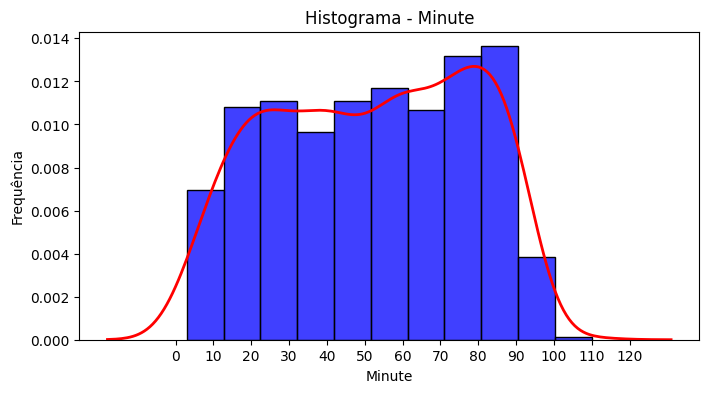

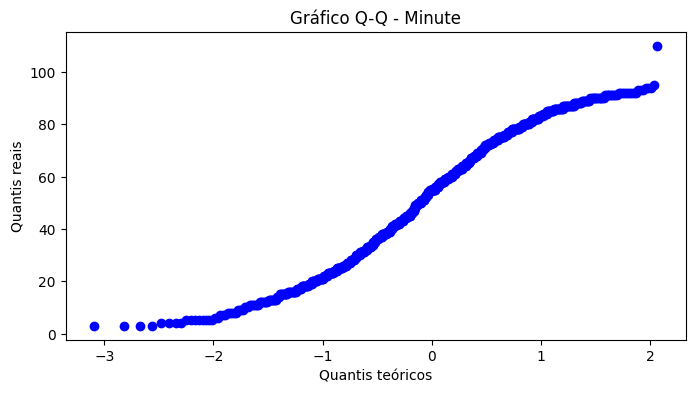

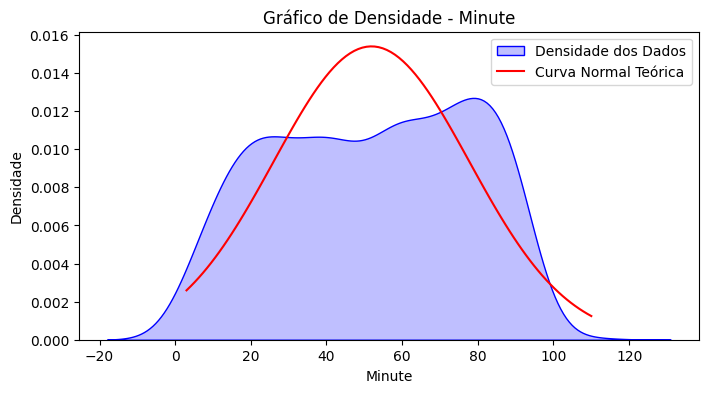

In [31]:
for col in numeric_columns[0:1]:
    plt.figure(figsize=(8, 4))

    # Histograma
    sns.histplot(data[col], color='blue', stat='density')
    # Curva KDE
    sns.kdeplot(data[col], color='red', linewidth=2)
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(ticks=np.arange(0, 121, 10))  # Define os ticks de 0 a 120 com passos de 10
    plt.show()

    # Gráfico Q-Q
    plt.figure(figsize=(8, 4))
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q - {col}')
    plt.xlabel('Quantis teóricos')
    plt.ylabel('Quantis reais')
    plt.show()
    
    # Gráfico de densidade
    plt.figure(figsize=(8, 4))

    sns.kdeplot(data[col], color='blue', label='Densidade dos Dados', fill=True)
    
    # ADICIONA UMA CURVA NORMAL TEÓRICA BASEADA NA MÉDIA E DESVIO PADRÃO DOS DADOS
    mean = data[col].mean()
    std = data[col].std()
    x = np.linspace(data[col].min(), data[col].max(), 100)
    
    plt.plot(x, norm.pdf(x, loc=mean, scale=std), color='red', label='Curva Normal Teórica')
    
    plt.title(f'Gráfico de Densidade - {col}')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()


- **Historiograma**: Há uma concentração de eventos entre aproximadamente 20 e 80 minutos, indicando que esses períodos são os mais ativos. A maior concentração de valores acontece perto da na cauda (minutos finais do tempo normal de jogo). O pico da curva ocorre entre 70 e 90 minutos. Isso sugere que os dados não seguem uma distribuição normal, com o historiograma apresentando uma assimetria à direita
- **Gráfico Q-Q**: Os pontos se desviam totalmente de uma linha reta, indicando que os dados não seguem a normalidade.
- **Gráfico de Densidade**: A distribuição não é perfeitamente normal devido à assimetria.

Os eventos estão concentrados no intervalo entre 30 e 80 minutos, com poucos eventos nos extremos (antes de 20 ou após 90).
A distribuição não é normal e reflete características esperadas em jogos de futebol: 
- Menos eventos nos minutos iniciais e finais.
- Alguns valores elevados devido às prorrogações.

##### Variáveis de result

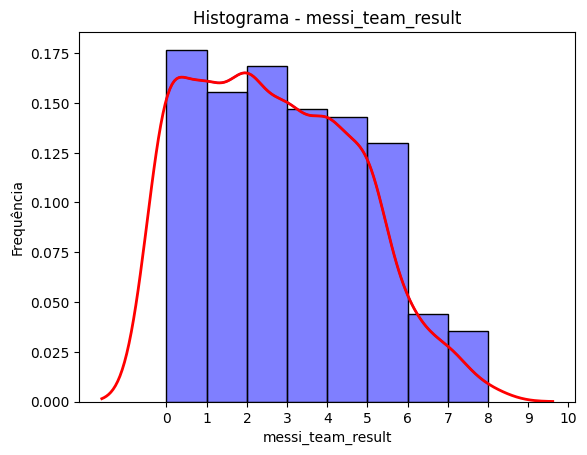

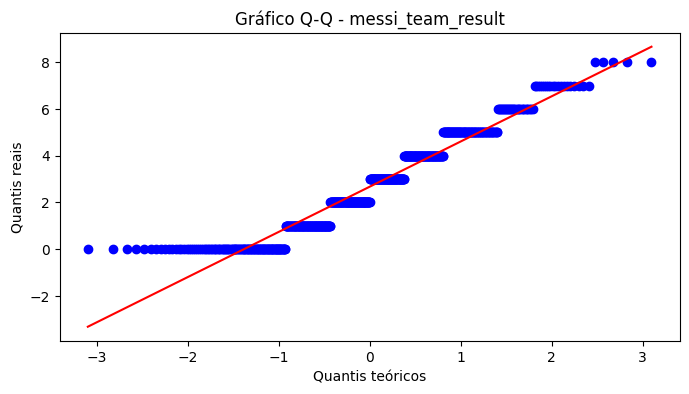

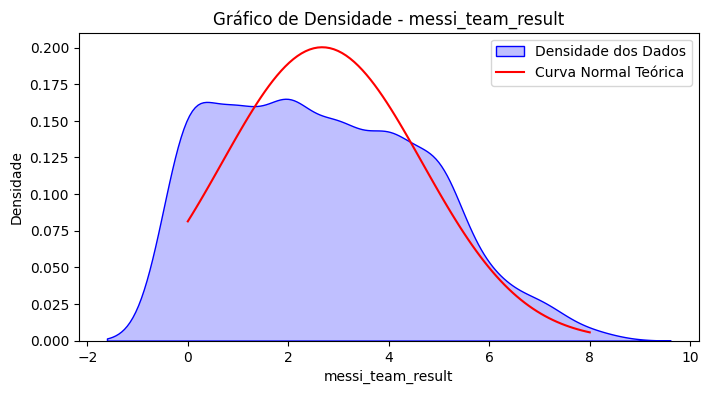

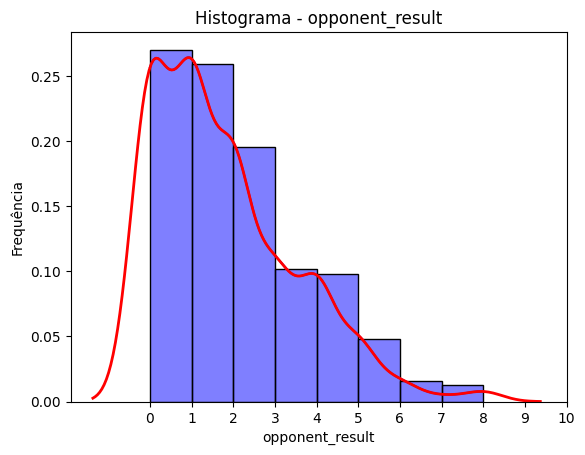

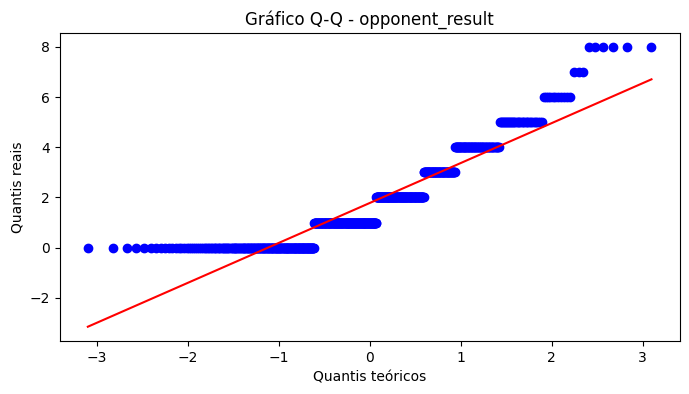

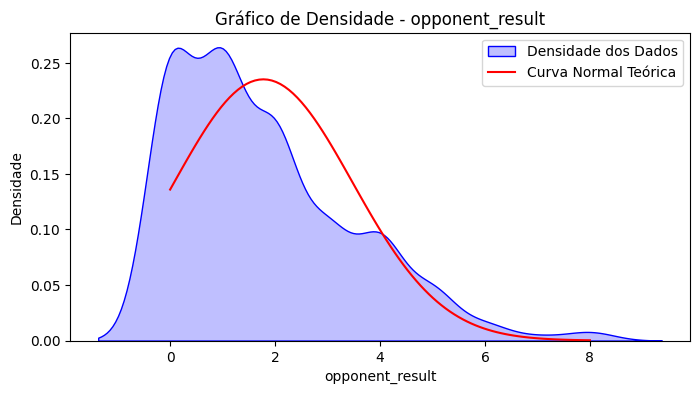

In [32]:
# Loop para as colunas 1 a 2
for col in numeric_columns[1:3]:
    # Histograma com KDE
    sns.histplot(data[col], kde=True, color='blue', stat='density', binwidth=1)
    sns.kdeplot(data[col], color='red', linewidth=2)
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(ticks=np.arange(0, 11, 1))  # Define os ticks de 0 a 10 com passo de 1
    plt.show()

    # Gráfico Q-Q
    plt.figure(figsize=(8, 4))
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)  # Remove valores nulos antes do cálculo
    plt.title(f'Gráfico Q-Q - {col}')
    plt.xlabel('Quantis teóricos')
    plt.ylabel('Quantis reais')
    plt.show()

    # Gráfico de densidade
    plt.figure(figsize=(8, 4))
    
    # Densidade dos dados (KDE)
    sns.kdeplot(data[col], color='blue', label='Densidade dos Dados', fill=True)

    # Curva Normal Teórica
    mean = data[col].mean()  # Calcula a média da coluna 
    std = data[col].std()    # Calcula o desvio padrão da coluna
    
    x = np.linspace(data[col].min(), data[col].max(), 100)

    plt.plot(x, norm.pdf(x, loc=mean, scale=std), color='red', label='Curva Normal Teórica')
    
    plt.title(f'Gráfico de Densidade - {col}')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()


**Messi Team Result:**
- **Historiograma**: A maior frequência está entre 0 e 3 gols, com uma redução gradual até 8 gols.
- **Gráfico Q-Q**: Os pontos são razoavelmente próximos da linha reta no centro da distribuição, mas se desviam significativamente nas extremidades.
- **Gráfico de Densidade**: A curva teórica não se ajusta bem aos dados reais, especialmente na região inicial e na cauda à direita.
  
**A variável não segue uma distribuição normal.**

**Opponent Result:**
- **Historiograma**: A forma não é simétrica nem em formato de sino, como esperado para uma distribuição normal.
- **Gráfico Q-Q**: Os pontos se desviam significativamente da linha reta nas extremidades (quantis altos e baixos).
- **Gráfico de Densidade**: A densidade dos dados tem um pico inicial em torno de 0 e uma cauda longa à direita, indicando uma assimetria positiva.
  
**A variável não segue uma distribuição normal.**

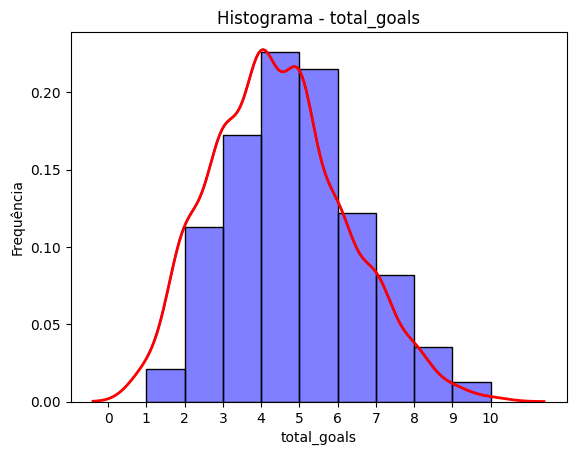

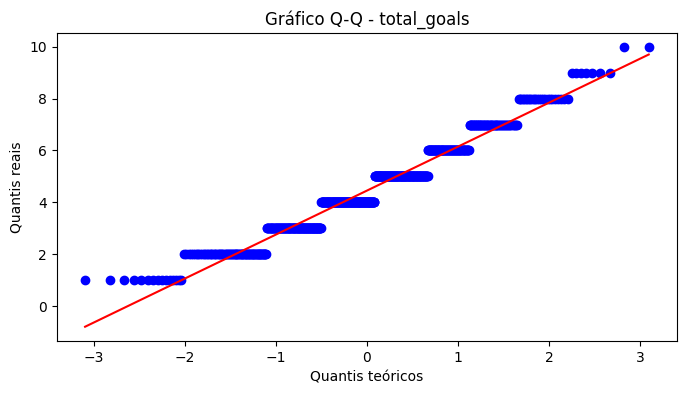

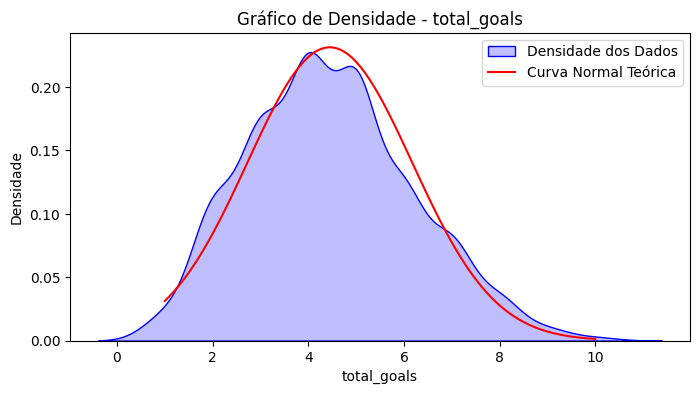

In [33]:
# Loop para a posição 3
for col in numeric_columns[3:4]:
    # Histograma com KDE
    sns.histplot(data[col], kde=True, color='blue', binwidth=1, stat='density')
    sns.kdeplot(data[col], color='red', linewidth=2)
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(ticks=np.arange(0, 11, 1))  # Define os ticks de 0 a 10 com passo de 1
    plt.show()

    # Gráfico Q-Q
    plt.figure(figsize=(8, 4))
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)  # Remove valores nulos antes do cálculo
    plt.title(f'Gráfico Q-Q - {col}')
    plt.xlabel('Quantis teóricos')
    plt.ylabel('Quantis reais')
    plt.show()

    # Gráfico de densidade
    plt.figure(figsize=(8, 4))
    
    # Densidade dos dados (KDE)
    sns.kdeplot(data[col], color='blue', label='Densidade dos Dados', fill=True)

    # Curva Normal Teórica
    mean = data[col].mean() 
    std = data[col].std()  
    
    x = np.linspace(data[col].min(), data[col].max(), 100)
    
    plt.plot(x, norm.pdf(x, loc=mean, scale=std), color='red', label='Curva Normal Teórica')
    
    plt.title(f'Gráfico de Densidade - {col}')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()


**Total Goals:**
- **Historiograma**: Formato de sino.
- **Gráfico Q-Q**: Os pontos seguem razoavelmente bem a linha reta, indicando que os quantis dos dados reais estão próximos dos quantis teóricos de uma distribuição normal.
Pequenas discrepâncias aparecem nas extremidades (caudas), onde os pontos se desviam da linha.
- **Gráfico de Densidade**: A densidade dos dados apresenta um formato aproximadamente simétrico, com um pico em torno de 4 a 5 gols.
A curva normal teórica (vermelha) se ajusta razoavelmente bem à densidade dos dados, com pequenas discrepâncias.

**A variável total_goals segue uma distribuição aproximadamente normal, mas não perfeitamente.**

##### Variáveis de at_score

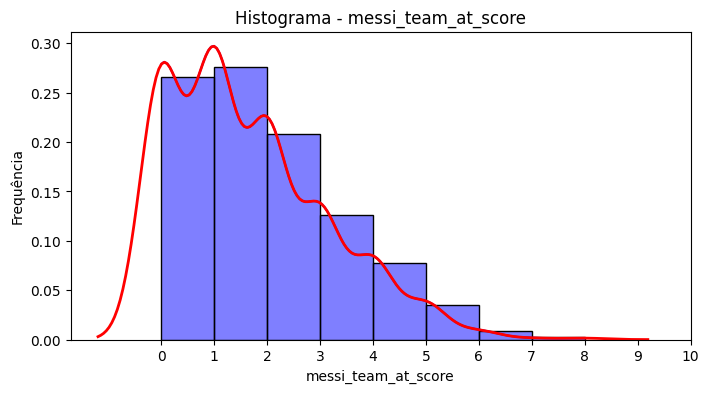

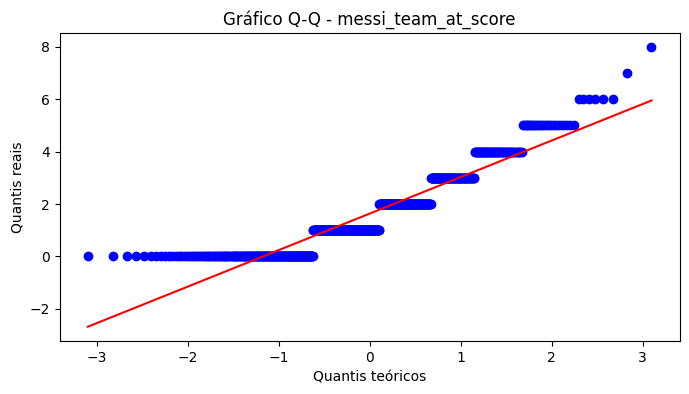

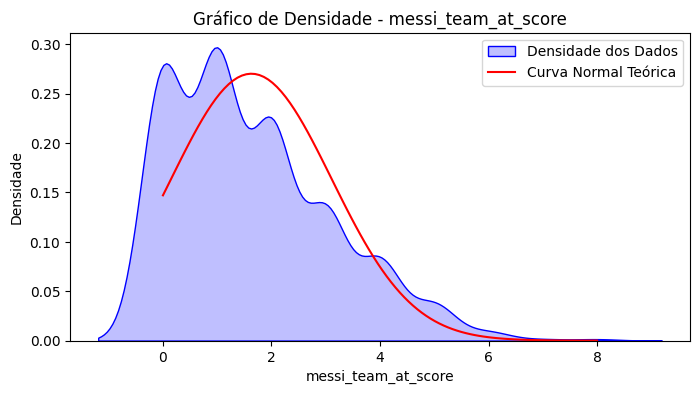

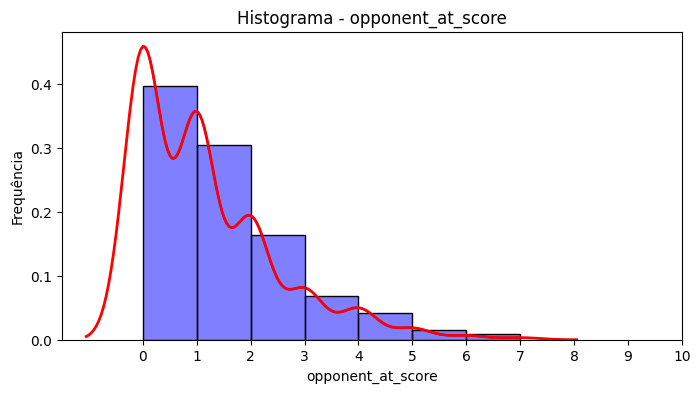

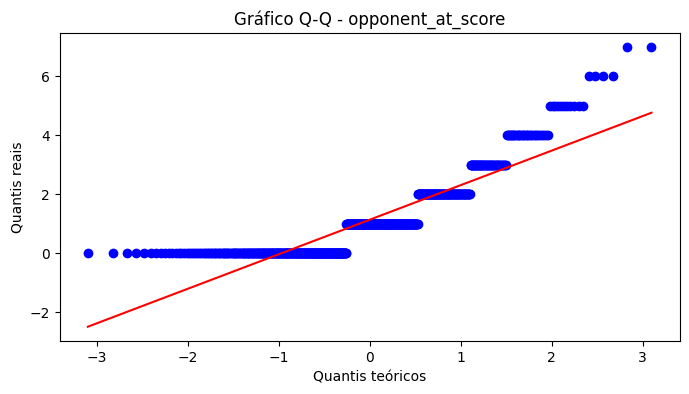

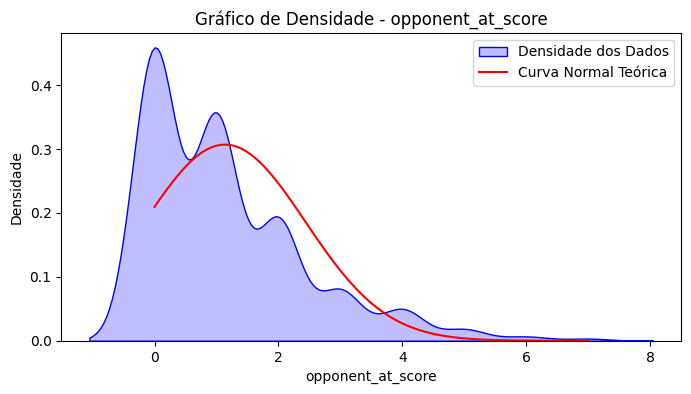

In [34]:
# Loop para as posições 4 e 5
for col in numeric_columns[4:6]:
    # Histograma com KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='blue', binwidth=1, stat='density')
    sns.kdeplot(data[col], color='red', linewidth=2)
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(ticks=np.arange(0, 11, 1))  # Define os ticks de 0 a 10 com passo de 1
    plt.show()

    # Gráfico Q-Q
    plt.figure(figsize=(8, 4))
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)  # Remove valores nulos antes do cálculo
    plt.title(f'Gráfico Q-Q - {col}')
    plt.xlabel('Quantis teóricos')
    plt.ylabel('Quantis reais')
    plt.show()

    # Gráfico de densidade
    plt.figure(figsize=(8, 4))
    
    # Densidade dos dados (KDE)
    sns.kdeplot(data[col], color='blue', label='Densidade dos Dados', fill=True)

    # Curva Normal Teórica
    mean = data[col].mean()  
    std = data[col].std() 
    
    x = np.linspace(data[col].min(), data[col].max(), 100)
    
    plt.plot(x, norm.pdf(x, loc=mean, scale=std), color='red', label='Curva Normal Teórica')
    
    plt.title(f'Gráfico de Densidade - {col}')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()


**Messi Team At Score:**
- **Historiograma**: A maior frequência está entre 0 e 2 gols, com uma redução gradual até 7 gols.
- **Gráfico Q-Q**: A maior parte dos pontos está longe da linha reta no centro da distribuição, desviando significativamente nas extremidades.
- **Gráfico de Densidade**: A curva teórica não se ajusta bem aos dados reais, especialmente na região inicial.
  
**A variável não segue uma distribuição normal.**

**Opponent At Score:**
- **Historiograma**: Conforme o número de gols aumenta, a frequência diminui rapidamente. A forma não é simétrica nem em formato de sino.
- **Gráfico Q-Q**: Os pontos se desviam significativamente da linha reta.
- **Gráfico de Densidade**: Possui uma cauda longa à direita, típica de distribuições assimétricas.
  
**A variável não segue uma distribuição normal.**

#### d) Indicação da presença de valores faltosos em cada variável

In [35]:
data.to_csv('dados_tratados.csv', index=False)

In [36]:
data.isna().sum()

Season                  0
Competition             0
Matchday                0
Date                    0
Venue                   0
Club                    0
Opponent               10
Result                  0
Playing_Position        0
Minute                 13
At_score                0
Type                    1
Goal_assist             0
result_cleaned          0
extra_time_flag         0
messi_team_result       0
opponent_result         0
total_goals             0
messi_team_at_score     0
opponent_at_score       0
dtype: int64

Detalharemos melhor na próxima questão.

### 2. Limpeza dos dados

Existem várias técnicas para lidar com dados faltantes, incluindo a exclusão de casos, imputação e modelagem. A exclusão de casos envolve remover registros com dados faltantes, o que pode ser viável quando a quantidade de dados ausentes é pequena. A imputação, por outro lado, envolve preencher os dados ausentes com estimativas baseadas em outras informações disponíveis, utilizando métodos como média, mediana ou algoritmos mais complexos, como KNN (K-Nearest Neighbors).

Fonte: <https://estatisticafacil.org/glossario/o-que-e-analise-de-dados-faltantes/>

Cada variável com valores faltantes será tratada como variável alvo, enquanto as demais serão usadas como preditoras.

- Conjunto de Treinamento: Contém as linhas onde a variável alvo não possui valores faltantes.
- Conjunto de Teste: Contém as linhas onde a variável alvo possui valores faltantes.

##### Convertendo Date para dias desde o início da carreira

In [37]:
from datetime import datetime
# Novo dataframe para guardar as transformações
df = pd.DataFrame(data)
# Converte a coluna para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Data do primeiro gol oficial (1º de maio de 2005)
start_date = datetime(2005, 5, 1)
# Diferença em dias desde o início da carreira
df['Date'] = (df['Date'] - start_date).dt.days
df['Date'] = df['Date'].astype('int64')
df['Date'].unique()

array([   0,  273,  293,  276,  185,  266,  259,  210,  769,  678,  717,
        685,  777,  749,  496,  699,  532,  514,  484,  874,  884, 1029,
       1099,  940,  871, 1025,  937,  889,  920,  878,  881,  910, 1364,
       1406, 1346, 1421, 1372, 1280, 1308, 1249, 1473, 1270, 1245, 1410,
       1438, 1283, 1239, 1462, 1295, 1291, 1351, 1322, 1357, 1448, 1252,
       1487, 1403, 1455, 1400, 1305, 1231, 1683, 1826, 1785, 1715, 1778,
       1801, 1728, 1602, 1638, 1690, 1829, 1841, 1612, 1693, 1679, 1781,
       1575, 1605, 1595, 1721, 1742, 1770, 1798, 1833, 1763, 1651, 1805,
       1654, 2218, 1998, 2096, 1946, 2121, 2137, 2082, 1962, 1938, 2008,
       1967, 2051, 2131, 2043, 1981, 2022, 2029, 2001, 2169, 2187, 2089,
       2099, 2011, 2033, 2078, 2172, 2106, 2127, 2019, 2176, 2092, 2016,
       2183, 2485, 2337, 2502, 2341, 2407, 2492, 2311, 2296, 2372, 2450,
       2561, 2330, 2581, 2529, 2358, 2393, 2375, 2422, 2536, 2299, 2555,
       2558, 2512, 2519, 2526, 2380, 2506, 2515, 24

##### Convertendo Season para anos desde o início da carreira

In [38]:
df['Season'].unique()

array(['04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11',
       '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18',
       '18/19', '19/20', '20/21', '21/22', '22/23'], dtype=object)

In [39]:
def calculate_years_since_start(temporada):
    start_year = int(temporada.split('/')[0])  # Extrai o ano inicial da temporada
    # Ajusta para o formato completo do ano
    start_year += 2000 if start_year < 50 else 1900
    career_start_year = 2004
    return start_year - career_start_year

df['Season'] = df['Season'].apply(calculate_years_since_start)

# Trata valores NaN e converte para inteiro
df['Season'] = df['Season'].fillna(0).astype(int)
df['Season'] = df['Season'].astype('int64')
df['Season'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

##### Conferindo as colunas

In [40]:
#Removendo colunas que foram divididas
df = df.drop(columns=['Result', 'At_score', 'result_cleaned'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Season               707 non-null    int64 
 1   Competition          707 non-null    object
 2   Matchday             707 non-null    object
 3   Date                 707 non-null    int64 
 4   Venue                707 non-null    object
 5   Club                 707 non-null    object
 6   Opponent             697 non-null    object
 7   Playing_Position     707 non-null    object
 8   Minute               694 non-null    Int64 
 9   Type                 706 non-null    object
 10  Goal_assist          707 non-null    object
 11  extra_time_flag      707 non-null    bool  
 12  messi_team_result    707 non-null    Int64 
 13  opponent_result      707 non-null    Int64 
 14  total_goals          707 non-null    Int64 
 15  messi_team_at_score  707 non-null    Int64 
 16  opponent

#### d.) Análise dos outliers

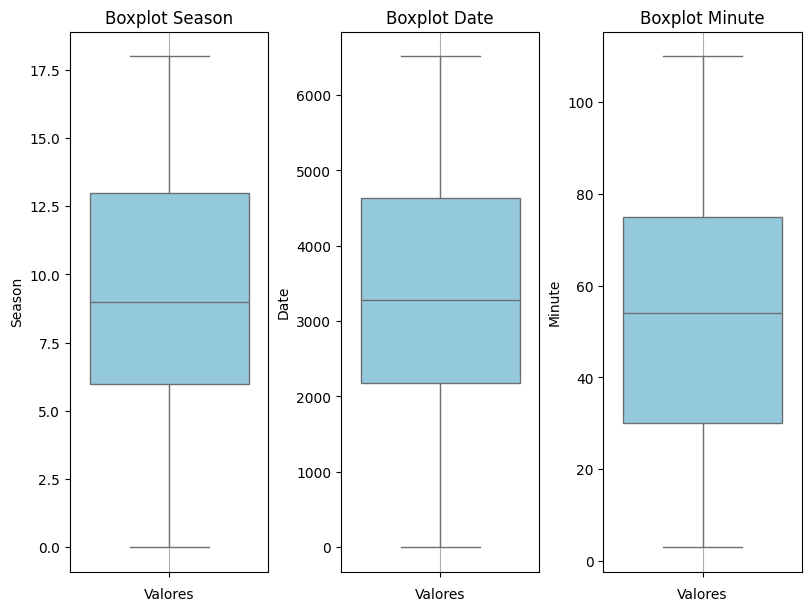

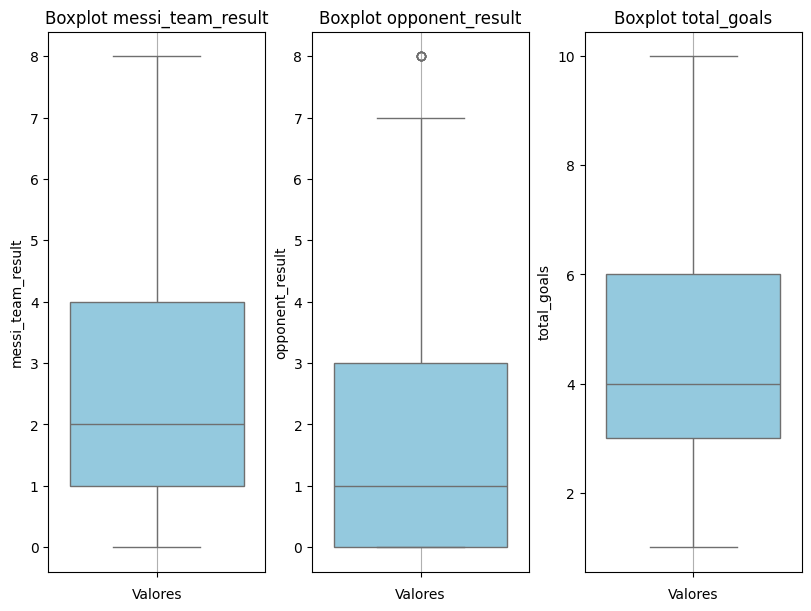

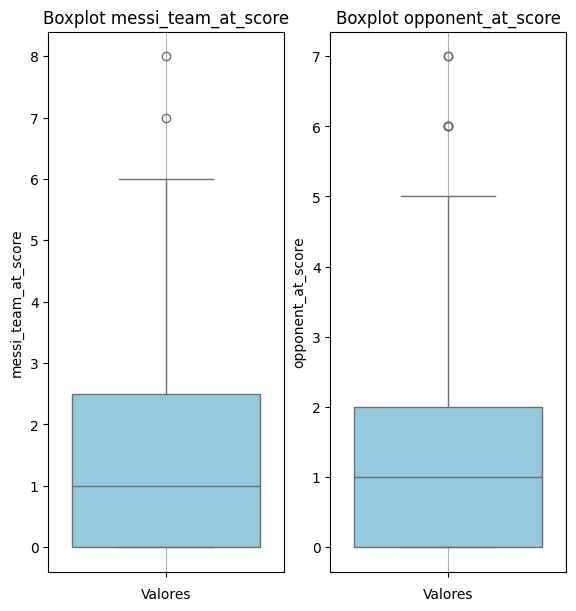

In [41]:
numerical_columns = ['Season', 'Date', 'Minute', 'messi_team_result',
                     'opponent_result', 'total_goals', 'messi_team_at_score',
                     'opponent_at_score']

# Configuração para exibir 3 gráficos por vez
n_cols = 3  # Número de gráficos por linha
n_rows = -(-len(numerical_columns) // n_cols)  # Calcula o número de linhas necessário (arredondamento para cima)

# Itera em blocos de 3 gráficos
for i in range(0, len(numerical_columns), n_cols):

    fig, axes = plt.subplots(1, n_cols, figsize=(8, 6), constrained_layout=True)
    
    # Garante que axes seja sempre uma lista (mesmo com apenas 1 linha)
    if n_cols == 1:
        axes = [axes]
    
    # Plota cada gráfico no bloco atual
    for j, col in enumerate(numerical_columns[i:i + n_cols]):
        # Remove valores ausentes da coluna
        data_cleaned = df[col].dropna()
        
        # Cria o boxplot no eixo correspondente
        sns.boxplot(y=data_cleaned, ax=axes[j], color='skyblue')
        axes[j].set_title(f"Boxplot {col}")
        axes[j].set_ylabel(col)
        axes[j].set_xlabel("Valores")
        axes[j].grid(axis='x')
    
    # Remove subplots vazios (se houver menos de 3 gráficos no último bloco)
    for j in range(len(numerical_columns[i:i + n_cols]), n_cols):
        fig.delaxes(axes[j])
    
    plt.show()


##### Isolation Forest

Se baseia no conceito de que anomalias são mais fáceis de isolar do que os dados normais devido à sua raridade e diferença em relação ao restante do conjunto de dados.

In [42]:
data_numerico = df.select_dtypes(include=['number']).copy()
data_numerico = data_numerico.drop(columns=['Season', 'Date'])

In [43]:
from sklearn.ensemble import IsolationForest

data_anomaly = data_numerico.copy()

data_anomaly['Minute'] = data_anomaly['Minute'].fillna(data_anomaly['Minute'].median())

model = IsolationForest(n_estimators=100, random_state=42)
model.fit(data_anomaly)

data_anomaly['Anomaly_Score'] = model.decision_function(data_anomaly)

outliers = data_anomaly[data_anomaly['Anomaly_Score'] < -0.1]

print("\nNúmero de Outliers Detectados:", len(outliers))
print(outliers)


Número de Outliers Detectados: 24
     Minute  messi_team_result  opponent_result  total_goals  \
59       75                  2                6            8   
72       89                  1                6            7   
145      67                  0                8            8   
154      36                  0                8            8   
163      16                  0                8            8   
193       5                  8                0            8   
234      88                  0                7            7   
235      85                  7                1            8   
236      79                  8                0            8   
247      41                  8                0            8   
254      17                  4                5            9   
282      76                  4                5            9   
288      43                  4                5            9   
315      88                  7                0            7   
358  

Visualmente, percebemos que os outliers se referem a partidas com grande quantidade de gols.

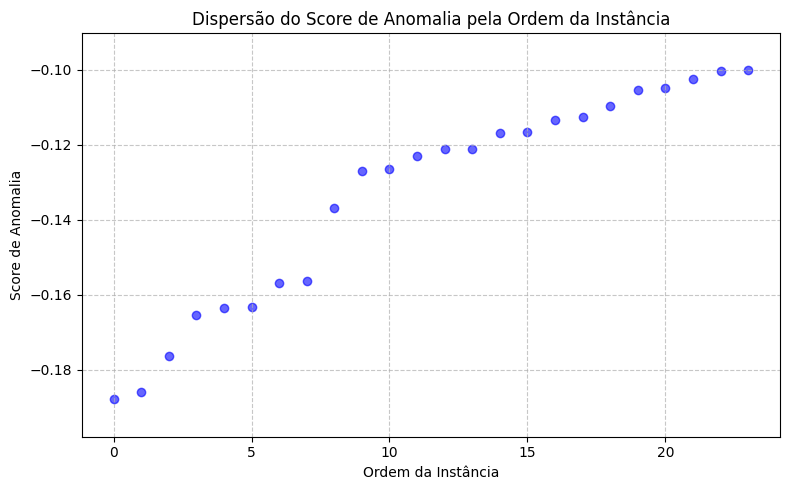

In [44]:
# Ordenando os outliers pelo score
outliers_sorted = outliers.sort_values('Anomaly_Score')

plt.figure(figsize=(8, 5))
plt.scatter(range(len(outliers_sorted)), outliers_sorted['Anomaly_Score'], color='blue', alpha=0.6)

plt.title('Dispersão do Score de Anomalia pela Ordem da Instância')
plt.xlabel('Ordem da Instância')
plt.ylabel('Score de Anomalia')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajusta os limites do eixo y para melhor visualização
plt.ylim(min(outliers_sorted['Anomaly_Score']) - 0.01, max(outliers_sorted['Anomaly_Score']) + 0.01)

plt.tight_layout()
plt.show()

O outlier mais significativo tem score de -0,18, correspondendo ao minuto 61 com 8 gols da equipe e 2 do adversário. Trata-se de um dado importante: incomum, mas não incorreto.

#### a.) Substituição dos valores faltosos por meio de indutor

In [45]:
data_categorico = df.select_dtypes(include=['object', 'bool']).copy()
data_numerico = df.select_dtypes(include=['number']).copy()

print("Colunas qualitativas: ", data_categorico.columns)
print("Colunas quantitativas: ", data_numerico.columns)

Colunas qualitativas:  Index(['Competition', 'Matchday', 'Venue', 'Club', 'Opponent',
       'Playing_Position', 'Type', 'Goal_assist', 'extra_time_flag'],
      dtype='object')
Colunas quantitativas:  Index(['Season', 'Date', 'Minute', 'messi_team_result', 'opponent_result',
       'total_goals', 'messi_team_at_score', 'opponent_at_score'],
      dtype='object')


#### Lidar com valores faltosos em Type

In [46]:
nan_indice_type = data_categorico[data_categorico['Type'].isnull()].index.tolist()
print("Índice de type com valor nan: ", nan_indice_type)

Índice de type com valor nan:  [15]


In [47]:
# Calcula a mediana de 'Type' 
mode_val = data['Type'].mode()[0] 

# Preenche apenas as linhas nos índices identificados com nan
data.loc[nan_indice_type, 'Type'] = mode_val

# Verificando se a imputação foi realizada corretamente
print("\nNulls after imputation: ", data['Type'].isnull().sum())
data.loc[nan_indice_type, 'Type']


Nulls after imputation:  0


15    Left-footed shot
Name: Type, dtype: object

#### Lidar com valores faltosos em Minute

##### Identificação

In [48]:
missing_minute_indices = data[data['Minute'].isna()].index.tolist()
print("Valores faltosos de minute nas linhas: ", missing_minute_indices)

Valores faltosos de minute nas linhas:  [10, 11, 12, 13, 17, 18, 19, 21, 23, 24, 279, 534, 674]


##### OneHotEncoder

In [49]:
from sklearn.preprocessing import OneHotEncoder

# APLICAÇÃO NAS COLUNAS CATEGÓRICAS
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# APRENDE AS CATEGORIAS PRESENTES EM CADA COLUNA DOS DADOS CATEGÓRICOS
encoded_data = encoder.fit_transform(data_categorico)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(data_categorico.columns))

# CONCATENAÇÃO COM AS COLUNAS NUMÉRICAS
df_for_knn = pd.concat([pd.DataFrame(data_numerico), encoded_df], axis=1)

linhas, colunas = df_for_knn.shape
print(f"Dataframe pra usar no modelo: \nLinhas: {linhas}, Colunas: {colunas}")

Dataframe pra usar no modelo: 
Linhas: 707, Colunas: 253


##### Verificação do resultado

##### Preparando o modelo

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

data_encoded = df_for_knn.copy()

# Separar instâncias com e sem valores faltantes na variável Minute
test_data = data_encoded[data_encoded['Minute'].isnull()].copy()
data_without_missing = data_encoded.dropna(subset=['Minute'])

# Dividir a base sem valores faltantes em treino e validação
train_data, val_data = train_test_split(data_without_missing, test_size=0.2, random_state=42) # 80% treino e 20% validação

print("Tamanho da base de treino:", len(train_data))
print("Tamanho da base de validação:", len(val_data))
print("Tamanho da base de teste:", len(test_data))

Tamanho da base de treino: 555
Tamanho da base de validação: 139
Tamanho da base de teste: 13


In [51]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Filtra linhas onde 'Minute' está ausente
missing_minute = data[data['Minute'].isna()].copy()
not_missing_minute = data[data['Minute'].notna()].copy()

# Separa as variáveis independentes e alvo
X = not_missing_minute[['messi_team_result', 'opponent_result', 'total_goals', 'messi_team_at_score', 'opponent_at_score']]
y = not_missing_minute['Minute']

# Garante que X seja um DataFrame com os nomes das colunas
X = pd.DataFrame(X)

# Garante que y não tenha valores não numéricos ou faltantes
y = y.fillna(0).astype(float)

# Aplica  transformação polinomial nas variáveis (melhora a precisão)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Normaliza os dados
scaler = StandardScaler()
X_poly= scaler.fit_transform(X_poly)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


##### KNN Regressor

In [52]:
# Busca os melhores hiperparâmetros para o KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_absolute_error')
grid_knn.fit(X_train, y_train)
knn = grid_knn.best_estimator_

print("Melhor configuração de KNN:", grid_knn.best_params_)

# Preparando o modelo
knn_imputer = KNNImputer(n_neighbors=3)
X = knn_imputer.fit_transform(X)

# Treinamento e predição 
y_pred_knn = knn.predict(X_test)

Melhor configuração de KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


##### Regressão Linear

In [53]:
# Treinamento e predição com Regressão Linear
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_lr = linear.predict(X_test)

##### Métricas de Desempenho

MSE ≥ 0: Valores maiores indicam pior ajuste.

0 ≤ R² ≤ 1: Valores próximos a 1 indicam melhor ajuste.

In [54]:
# MAE (Mean Absolute Error)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# R² (Coeficiente de determinação)
r2_knn = r2_score(y_test, y_pred_knn)
r2_lr = r2_score(y_test, y_pred_lr)

# MSE (Root Mean Square Error)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("KNN Regressor:")
print(f"MAE: {mae_knn:.2f}, MSE:  {mse_knn:.2f}, R²: {r2_knn:.2f}")

print("\nRegressão Linear:")
print(f"MAE: {mae_lr:.2f}, MSE:  {mse_lr:.2f}, R²: {r2_lr:.2f}")

KNN Regressor:
MAE: 14.21, MSE:  315.02, R²: 0.53

Regressão Linear:
MAE: 13.18, MSE:  270.44, R²: 0.59


##### Análise de erros (resíduos)

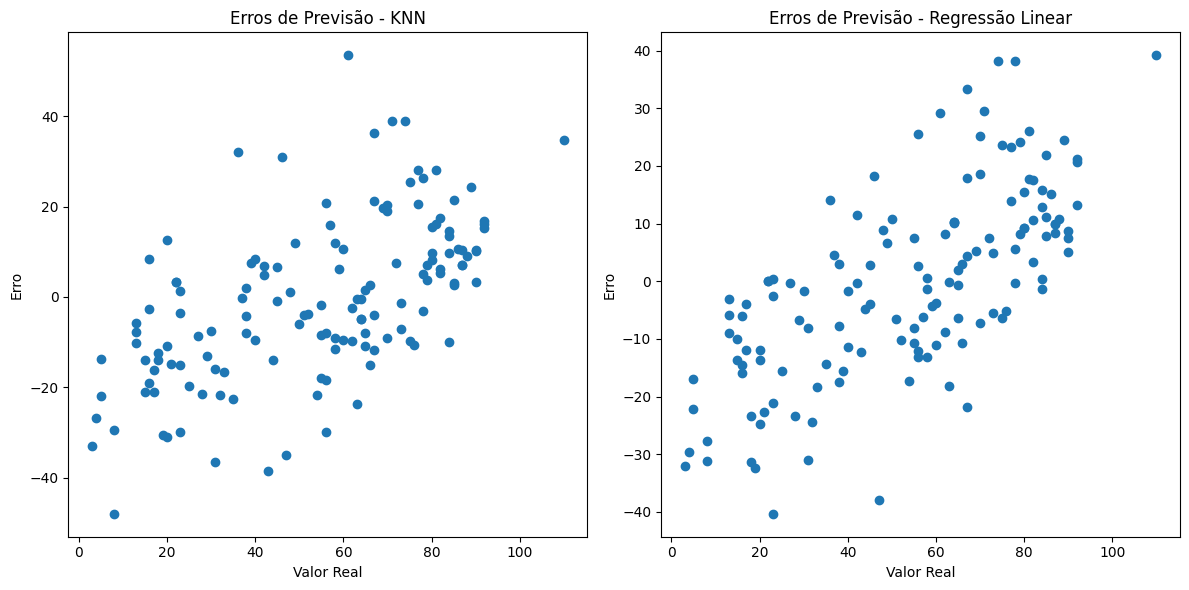

C:\Users\ferna\OneDrive\Área de Trabalho\TADS\2024.2\Ciencia de Dados\Unidade 3\Trabalho\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [55]:
residuals_knn = y_test - y_pred_knn
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_knn)
plt.title("Erros de Previsão - KNN")
plt.xlabel("Valor Real")
plt.ylabel("Erro")

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_lr)
plt.title("Erros de Previsão - Regressão Linear")
plt.xlabel("Valor Real")
plt.ylabel("Erro")

plt.tight_layout()
plt.show()

# Previsão para valores faltantes
X_missing = missing_minute[['messi_team_result', 'opponent_result','total_goals', 'messi_team_at_score', 'opponent_at_score']]
X_missing = knn_imputer.transform(X_missing)
X_missing = poly.transform(X_missing)
X_missing = scaler.transform(X_missing)

# Salvando resultados na database que contém apenas os nan
missing_minute.loc[:, 'Minute_KNN'] = knn.predict(X_missing)
missing_minute.loc[:, 'Minute_LR'] = linear.predict(X_missing)

# Verificação em outro arquivo
missing_minute.to_csv('missing_minute_predictions.csv', index=False)

O gráfico ideal seria aquele em que os resíduos estão espalhados aleatoriamente ao redor de zero, sem tendência sistemática.

##### Salvar resultados

In [56]:
# Cria uma cópia do DataFrame original
df_minute_imputed = data.copy()

# Transforma os valores previstos para int64 antes da substituição
predicted_values = missing_minute.loc[missing_minute_indices, 'Minute_LR'].values.astype('int64')

# Fazer a substituição com os valores já convertidos
df_minute_imputed.loc[missing_minute_indices, 'Minute'] = predicted_values

df_minute_imputed.to_csv('df_minute_imputed.csv', index=False)

In [57]:
# Verificando o resultado
print("Minutes nulos após imputação: ", df_minute_imputed['Minute'].isna().sum())

Minutes nulos após imputação:  0


#### Lidar com valores faltoso em Opponent

In [58]:
missing_opponent_indices = df[df['Opponent'].isna()].index.tolist()

print("Valores faltosos de opponent nas linhas: ", missing_opponent_indices)

Valores faltosos de opponent nas linhas:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 25]


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df_imputed = df_minute_imputed.copy()

# Separa as linhas com e sem NaN na coluna Opponent
rows_with_nan = df_imputed[df_imputed['Opponent'].isna()]
rows_without_nan = df_imputed.dropna(subset=['Opponent'])

# REMOVE A COLUNA OPPONENT E PEGA TODO O RESTANTE DAS COLUNAS NUMÉRICAS
X_train = rows_without_nan.drop('Opponent', axis=1).select_dtypes(include=['number'])
# SEPARA A VARIÁVEL ALVO
y_train = rows_without_nan['Opponent']

# CODIFICA A COLUNA ALVO EM NUMÉRICO, PARA PODER TRABALHAR NO MODELO
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# VARIÁVEIS QUE SALVAM O MELHOR VALOR E A ACURÁCIA
best_k = 0
best_accuracy = 0

# LOOPING DE TESTE DOS VALORES DE K PARA DETERMINAR AS IMPUTAÇÕES
for k in range(1, 21):
     # Cria o modelo k-NN com o valor atual de k
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan') 
    # Treina o modelo com os dados de treino
    knn.fit(X_train, y_train_encoded)
    # Faz previsões no conjunto de treino
    y_pred = knn.predict(X_train)  
    # Calcula a acurácia das previsões
    accuracy = accuracy_score(y_train_encoded, y_pred)
    # Atualiza o melhor k e a maior acurácia, caso a atual seja maior
    if accuracy > best_accuracy:  
        best_k = k
        best_accuracy = accuracy

print(f"Melhor valor de k: {best_k}, com acurácia: {best_accuracy * 100:.2f}%")


Melhor valor de k: 3, com acurácia: 92.83%


In [60]:
# Cria o modelo k-NN com o melhor k
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='manhattan') 
knn.fit(X_train, y_train_encoded)  # Treina o modelo novamente com os dados de treino

X_nan = rows_with_nan.drop('Opponent', axis=1).select_dtypes(include=['number'])
# PREVÊ E DECODIFICA OS VALORES PARA O FORMATO ORIGINAL
predicted_values = label_encoder.inverse_transform(knn.predict(X_nan))  

##### Salvando os resultados

In [61]:
# Imputar os valores previstos no DataFrame original
df_imputed.loc[rows_with_nan.index, 'Opponent'] = predicted_values 

# Salvar o resultado
df_imputed.to_csv('df_minute_and_opponent_imputed.csv', index=False)  

#### Verificação final de valores faltosos

In [62]:
df_imputed.isna().sum()

Season                 0
Competition            0
Matchday               0
Date                   0
Venue                  0
Club                   0
Opponent               0
Result                 0
Playing_Position       0
Minute                 0
At_score               0
Type                   0
Goal_assist            0
result_cleaned         0
extra_time_flag        0
messi_team_result      0
opponent_result        0
total_goals            0
messi_team_at_score    0
opponent_at_score      0
dtype: int64

In [63]:
df_imputed.dtypes

Season                 object
Competition            object
Matchday               object
Date                   object
Venue                  object
Club                   object
Opponent               object
Result                 object
Playing_Position       object
Minute                  Int64
At_score               object
Type                   object
Goal_assist            object
result_cleaned         object
extra_time_flag          bool
messi_team_result       Int64
opponent_result         Int64
total_goals             Int64
messi_team_at_score     Int64
opponent_at_score       Int64
dtype: object

### 3. Análise de Agrupamentos:

In [64]:
from sklearn.cluster import KMeans

#### a.) Análise das correlações entre as variáveis quantitativas.

Matriz de Correlação:
                       Minute  messi_team_result  opponent_result  \
Minute               1.000000          -0.130099         0.060624   
messi_team_result   -0.130099           1.000000        -0.573104   
opponent_result      0.060624          -0.573104         1.000000   
total_goals         -0.090644           0.591315         0.321978   
messi_team_at_score  0.337127           0.740428        -0.503759   
opponent_at_score    0.345047          -0.523489         0.824731   

                     total_goals  messi_team_at_score  opponent_at_score  
Minute                 -0.090644             0.337127           0.345047  
messi_team_result       0.591315             0.740428          -0.523489  
opponent_result         0.321978            -0.503759           0.824731  
total_goals             1.000000             0.359674           0.206819  
messi_team_at_score     0.359674             1.000000          -0.369445  
opponent_at_score       0.206819            

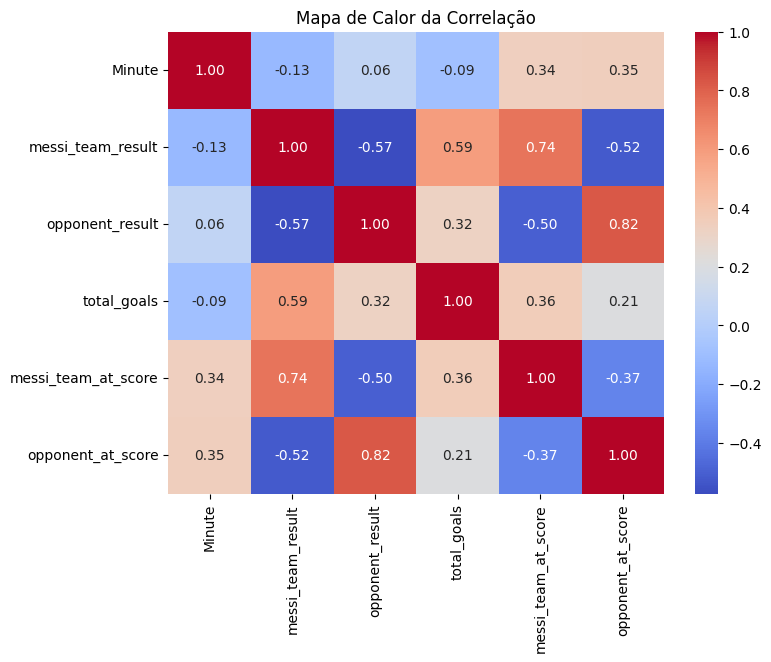

In [65]:
# APENAS VALORES NUMÉRICOS 
numerical_data = df_imputed.select_dtypes(include=['number'])

# CALCULAR MATRIZ DE CORRELAÇÃO
correlation_matrix = numerical_data.corr()

print("Matriz de Correlação:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Calor da Correlação")
plt.show()

##### **ANÁLISE DO MAPA DE CALOR**:

##### 1. Correalações fortes/altas:

- É possível perceber uma forte relação entre opponent_result e opponent_at_score, que é algo esperado, já que são variáveis que correspondem a quantidade de gols do adversário, e o resultado do jogo, o que está totalmente interligado.

- Outra forte correlação é a entre messi_team_result e messi_team_at_score, o que também é de se esperar, pois os gols de Messi interferem diretamente no resultado do seu time.

##### 2. Correlações negativas:

- opponnet_result e messi_result possuem correlações significativamente opostas, o que faz bastante sentido, já que, para um cenário de futebol, se o um time tem um bom desempenho, o outro time pode tender a ter um resultado inferior.

- Outras duas variáveis que possuem relações negativas são opponent_at_score e messi_team_result, que também condiz com o que é esperado, pelo mesmo motivo da anterior, já que, quanto mais gols o time adversário fizer, menor é a chance do time de Messi ter feito um bom resultado.

##### 3. Correlações moderadas:

- total_goals e messi_team_at_score tem uma relação moderada, pois, são influenciadas entre si, entretanto, outra variável que contribui para o total_goals é o opponent_result, que interfere juntamente com messi_team_at_score, então, faz sentido essas duas variáveis terem correlação moderada.

- Como citado anteriormente, a outra variável opponent_result contribui com total_goals, que é outra correlação moderada, o que é explicado acima.

##### 4. Correlações baixas:

- A variável Minute não tem correlação forte com nenhuma outra variável, que é condizente com a realidade, já que a minutagem não interfere em resultados ou gols da partida, nem do jogador.

##### Retirando variáveis com altas correções

In [66]:
# Selecionar apenas a parte superior da matriz de correlação (para evitar duplicatas)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identificar colunas com correlação >= 0.70
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.70)]

print("Variáveis a serem removidas devido à alta correlação:", to_drop)

Variáveis a serem removidas devido à alta correlação: ['messi_team_at_score', 'opponent_at_score']


In [67]:
numerical_data_reduced = numerical_data.drop(columns=to_drop)

#Removendo também do dataframe principal
df_imputed_reduced = df_imputed.drop(columns=to_drop)

#print("DataFrame após remoção de variáveis altamente correlacionadas:")
#print(numerical_data_reduced.head())
print(df_imputed_reduced.columns)

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist', 'result_cleaned', 'extra_time_flag', 'messi_team_result',
       'opponent_result', 'total_goals'],
      dtype='object')


#### b.) Análise descritiva identificando a melhor quantidade de grupos para o algoritmo k-Means ou hierárquico por meio do método do cotovelo.

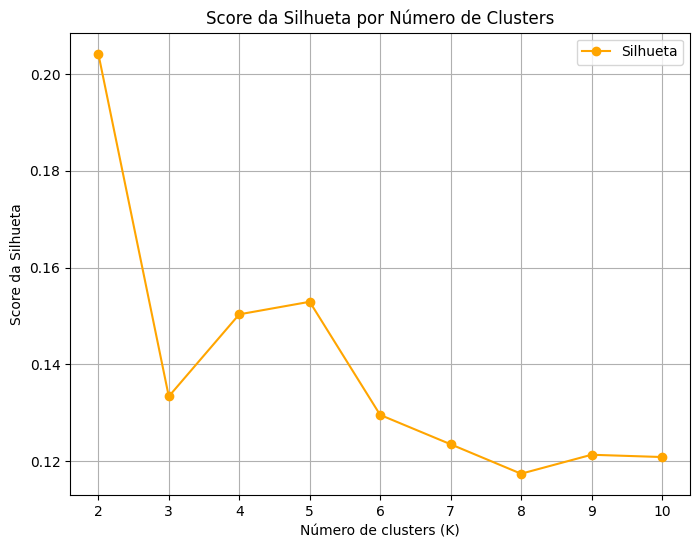

In [68]:
from sklearn.metrics import silhouette_score

dados = df_imputed_reduced.copy()

# TRANSFORMAÇÃO DAS VARIÁVEIS PARA NUMÉRICO PARA O PROCESSAMENTO
colunas_categoricas = [
    'Season', 'Competition', 'Venue', 'Club', 'Opponent', 
    'Result', 'Playing_Position', 'At_score', 'Type', 
    'Goal_assist',
]

encoder = LabelEncoder()

for col in colunas_categoricas:
    dados[col] = encoder.fit_transform(dados[col].astype(str))

# SELECIONA APENAS AS PARTES NUMÉRICAS, EXCLUINDO AS CATEGÓRICAS QUE NESSE PONTO FORAM TRANSFORMADAS JÁ
dados_numericos = dados.select_dtypes(include=['int64', 'float64']).values

# NORMALIZAÇÃO DOS DADOS, PARA QUE VARIÁVEIS ALTAS NÃO INTERFIRAM DIRETAMENTE NOS RESULTADOS
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)

# APLICANDO K-MEANS COM DIFERENTES K's PARA MÉTRICA DA SILHUETA
silhueta = []

for k in range(2, 11):  # K inicia em 2 porque a silhueta não é definida para K=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    silhueta.append(silhouette_score(dados_normalizados, kmeans.labels_))

# Plotando o gráfico da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhueta, marker='o', color='orange', label='Silhueta')
plt.title('Score da Silhueta por Número de Clusters')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Score da Silhueta')
plt.legend()
plt.grid(True)
plt.show()


##### **ANÁLISE DO GRÁFICO**

**IDENTIFICAÇÃO DO COTOVELO NO GRÁFICO E INTERPRETAÇÕES:**

- O pico observado no gráfico de silhueta encontra-se no K = 2, o que sugere que esse é o número ideal de clusters para particionar os dados.

- Após o pico em 2, o próximo grupo, K = 3, tem uma queda considerável no score.

#### c. Análise de redução de dimensionalidade usando PCA

Número ideal de componentes principais: 9 

Variância explicada por cada componente principal:
Componente 1: 27.32% de variância explicada
Componente 2: 11.13% de variância explicada
Componente 3: 10.54% de variância explicada
Componente 4: 9.03% de variância explicada
Componente 5: 8.48% de variância explicada
Componente 6: 7.51% de variância explicada
Componente 7: 6.92% de variância explicada
Componente 8: 6.05% de variância explicada
Componente 9: 5.88% de variância explicada
Componente 10: 3.82% de variância explicada
Componente 11: 1.68% de variância explicada
Componente 12: 1.26% de variância explicada
Componente 13: 0.39% de variância explicada
Componente 14: 0.00% de variância explicada


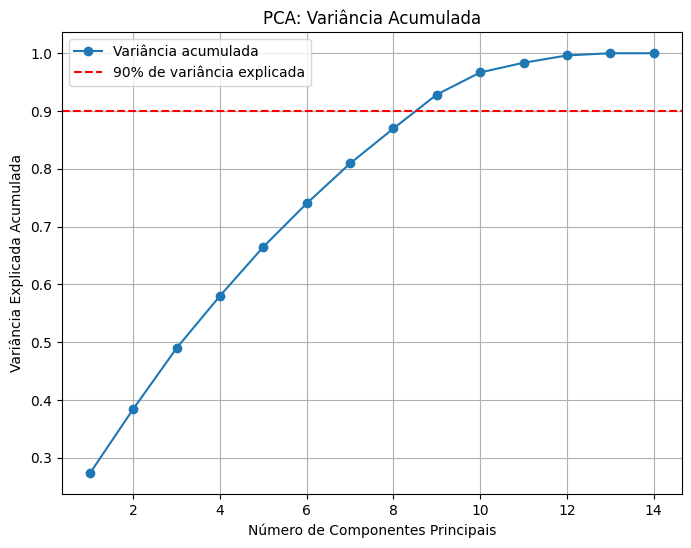

In [69]:
from sklearn.decomposition import PCA

pca_transformacao = PCA(n_components=dados_normalizados.shape[1])
resultado_pca = pca_transformacao.fit_transform(dados_normalizados)

# CALCULAR VARIÂNCIA
variancia_componentes = pca_transformacao.explained_variance_ratio_
variancia_acumulada_componentes = np.cumsum(variancia_componentes)

# DETERMINAR O NÚMERO DE COMPONENTES PRINCIPAIS
numero_componentes_ideais = np.argmax(variancia_acumulada_componentes >= 0.90) + 1
print(f"Número ideal de componentes principais: {numero_componentes_ideais} \n")

# EXIBIÇÃO DE CADA VARIÂNCIA
print("Variância explicada por cada componente principal:")
for index, variancia in enumerate(variancia_componentes):
    print(f"Componente {index+1}: {variancia:.2%} de variância explicada")

#print("\nVariância explicada acumulada:")
#print(variancia_acumulada_componentes)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(variancia_acumulada_componentes) + 1), variancia_acumulada_componentes, marker='o', label='Variância acumulada')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de variância explicada')
plt.title('PCA: Variância Acumulada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.grid()
plt.show()

# REDUÇÃO DOS DADOS USANDO O NÚMERO DE COMPONENTES IDEAL
pca_reduzido_final = PCA(n_components=numero_componentes_ideais)
dados_reduzidos_final = pca_reduzido_final.fit_transform(dados_normalizados)


##### ANÁLISE DOS GRÁFICOS

##### 1. Gráfico Variância Acumulada:

- Analisando o gráfico da variãncia acumulada, é possível notar que, a partir do número 9 de componentes principais, bate 90% de explicação da variância acumulada. Sendo assim, 9 é o ideal, já que captura a maior parte da variância com o menor custo computacional, e simplifica os dados sem uma perda significativa de informações.

##### 2. Gráfico 3D:
- Não podemos plotar um gráfico com as 9 componentes, mas é possível notar no gráfico 3D formado pelas 3 componentes principais que juntas elas explicam boa parte da variação dos dados (50% da variância total).

- Conclui-se que a redução foi feita de forma bem sucedida, por preservar a estrutura e a visualização dos dados dentro do gráfico

#### d.) Análise dos grupos identificados por métodos de visualização em baixa dimensionalidade com o auxílio do PCA.

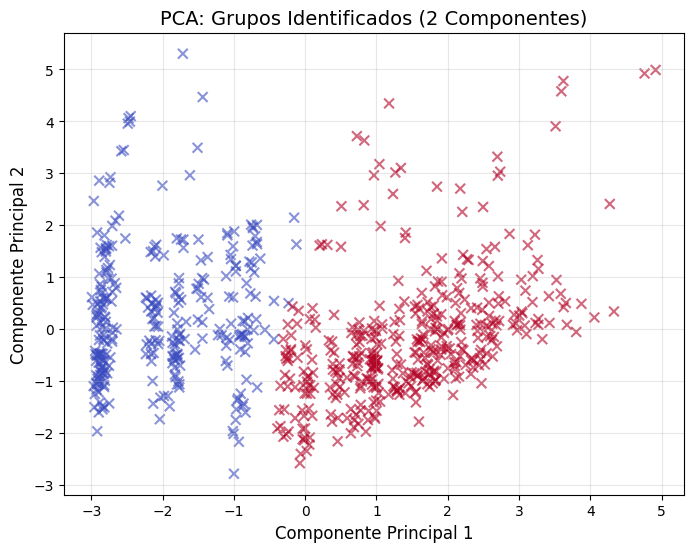

In [80]:
# Aplica K-Means com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
grupos = kmeans.fit_predict(dados_reduzidos_final)

plt.figure(figsize=(8, 6))
plt.scatter(
    dados_reduzidos_final[:, 0],  # Componente Principal 1
    dados_reduzidos_final[:, 1],  # Componente Principal 2
    c=grupos,                     # Cor dos pontos com base nos clusters
    cmap='coolwarm',               # Mapa de cores
    s=50,                         # Tamanho dos pontos
    alpha=0.6,                    # Transparência dos pontos
    marker='x'                    # Formato dos pontos como "X"
)

# Configuração do gráfico
plt.title('PCA: Grupos Identificados (2 Componentes)', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.grid(alpha=0.3) 


plt.show()

##### ANÁLISE: 

- É possível notar que os grupos identificados pelo K-Means estão bem delimitados no espaço dos componentes principais.

- Pelo que da para ver, o cluster amarelo é mais disperso, o que pode sugerir uma variabilidade maior nas características dessas partidas.

- O roxo é mais compacto, o que indica mais similaridade entre esses jogos.

- O outro cluster fica em posição intermediária e sobrepõe com os outros clusters, o que indica características compartilhadas entre esses grupos de clusters.

### 4. Análise preditiva

#### a.) Escolha de uma variável alvo para a predição
#### b.) Análise da relação entre as variáveis preditivas e a variável alvo por meio de um modelo estatístico de regressão.
#### c.) Análise dos melhores hyper-parâmetros dos indutores

Realizadas na questão 2 para predição da variável Minute. Realizaremos novamente, dessa vez com mais 2 variáveis categóricas como preditoras.

#### d.) Análise das melhores variáveis preditores por uma das técnicas de filtro ou wrappers

Escolhemos o wrapper método guloso.
- Forward Selection: Começa com um modelo sem variáveis e adiciona uma variável por vez, escolhendo a que mais melhora o modelo.

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SequentialFeatureSelector

# Dados conhecidos (sem valores ausentes em 'Minute')
data_without_missing_target = data[data['Minute'].notna()].copy()

# Variáveis independentes (numéricas e categóricas)
categorical_columns = ['Venue', 'Opponent']
numerical_columns = ['messi_team_result', 'opponent_result', 'total_goals', 'messi_team_at_score', 'opponent_at_score']
input_columns = categorical_columns + numerical_columns
target_column = 'Minute'

X_data = data_without_missing_target[input_columns]
y_data = data_without_missing_target[target_column]

# Garantir que o alvo seja numérico
y_data = y_data.fillna(0).astype(float)

# Pré-processamento 
preprocessing_steps = ColumnTransformer(
    transformers=[
        ('scale_numeric', StandardScaler(), numerical_columns),
        ('encode_categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Transformação polinomial aplicada após o pré-processamento
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

X_preprocessed = preprocessing_steps.fit_transform(X_data)
X_polynomial = polynomial_transformer.fit_transform(X_preprocessed)

# lidar com nomes das features após o pré-processamento e polinômio
preprocessed_feature_names = preprocessing_steps.get_feature_names_out()
polynomial_feature_names = polynomial_transformer.get_feature_names_out(input_features=preprocessed_feature_names)

# Divisão treino/teste
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_polynomial, y_data, test_size=0.2, random_state=42)

# Inicializa o modelo base
base_regressor = LinearRegression()

# Sequential Feature Selector
# ESCOLHEMOS FICAR COM AS 3 MELHORES
feature_selector = SequentialFeatureSelector(
    base_regressor,
    n_features_to_select=3, 
    direction='forward',
    scoring='neg_mean_absolute_error',
    cv=5
)

# Ajusta o SFS nos dados de treino
feature_selector.fit(X_train_split, y_train_split)

# Obtém os índices das melhores features
selected_feature_indices = feature_selector.get_support(indices=True)

# Obtém os nomes das features selecionadas
selected_feature_names = [polynomial_feature_names[i] for i in selected_feature_indices]

# Filtra os conjuntos de treino e teste com as features selecionadas
X_train_selected_features = X_train_split[:, selected_feature_indices]
X_test_selected_features = X_test_split[:, selected_feature_indices]

# Treinamento do modelo com as features selecionadas
final_regressor = LinearRegression()
final_regressor.fit(X_train_selected_features, y_train_split)

# Predições
y_predicted_selected_features = final_regressor.predict(X_test_selected_features)

# Avaliação do desempenho
mae_selected_features = mean_absolute_error(y_test_split, y_predicted_selected_features)

print("Erro médio absoluto com features selecionadas:", mae_selected_features)
print("Melhores variáveis selecionadas:", selected_feature_names)


NameError: name 'data' is not defined

#### e.) Análise da generalização dos indutores por holdout ou cross validation incluindo  gráfico de dispersão da variável alvo pelos valores preditos (problemas de regressão)


Avaliação por Cross-Validation:
Erro Médio Absoluto Médio (MAE - CV): 20.07


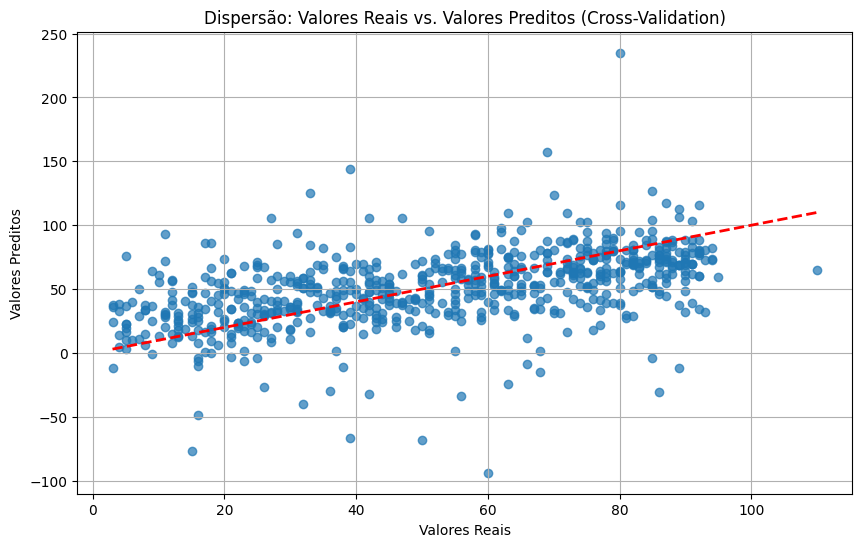

In [81]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

# Avaliação do modelo no conjunto de teste
mae_test = mean_absolute_error(y_test_split, y_predicted_selected_features)
mse_test = mean_squared_error(y_test_split, y_predicted_selected_features)
r2_test = r2_score(y_test_split, y_predicted_selected_features)

# print("Avaliação no conjunto de teste (Holdout):")
# print(f"Erro Médio Absoluto (MAE): {mae_test:.2f}")
# print(f"Erro Médio Quadrático (MSE): {mse_test:.2f}")
# print(f"R²: {r2_test:.2f}")

# Cross-Validation para avaliar generalização
cv_scores = cross_val_score(linear, X_polynomial, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae_mean = -cv_scores.mean()

print("\nAvaliação por Cross-Validation:")
print(f"Erro Médio Absoluto Médio (MAE - CV): {cv_mae_mean:.2f}")

y_pred_cv = cross_val_predict(linear, X_polynomial, y, cv=5)

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_cv, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2) 
plt.title("Dispersão: Valores Reais vs. Valores Preditos (Cross-Validation)")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.grid(True)
plt.show()